## getting the files

In [ ]:
import tarfile

file = tarfile.open("102flowers.tgz")

file.extractall('102flowers')

file.close()


C:\Users\alici\AppData\Local\Temp\ipykernel_308\3086026313.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  file.extractall('102flowers')


In [ ]:
import tarfile

file = tarfile.open("102segmentations.tgz")

file.extractall('102flowersSegmentations')

file.close()

C:\Users\alici\AppData\Local\Temp\ipykernel_308\1358158540.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  file.extractall('102flowersSegmentations')


In [ ]:
from scipy.io import loadmat
imagelabels = loadmat('imagelabels.mat')
print(imagelabels)

setid = loadmat('setid.mat')
print(setid)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', '__version__': '1.0', '__globals__': [], 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009', '__version__': '1.0', '__globals__': [], 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16), 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16), 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}


## visualisation

In [ ]:
import pandas as pd

df_labels = pd.DataFrame(imagelabels['labels'])
df_labels = df_labels.T
# rename the column such that it is image_id and labels
df_labels['image_id'] = df_labels.index +1
# drop index by making image_id as index
df_labels.set_index('image_id', inplace=True)
# set headers to be true
df_labels.columns = ['labels']
df_labels.head()


,labels
image_id,
1,77
2,77
3,77
4,77
5,77


In [ ]:
df_setid_trnid = pd.DataFrame(setid['trnid'])
df_setid_valid = pd.DataFrame(setid['valid'])
df_setid_tstid = pd.DataFrame(setid['tstid'])

df_setid_trnid = df_setid_trnid.T
df_setid_valid = df_setid_valid.T
df_setid_tstid = df_setid_tstid.T

print(df_setid_trnid.shape)
print(df_setid_valid.shape)
print(df_setid_tstid.shape)

(1020, 1)
(1020, 1)
(6149, 1)


In [ ]:
import os
image_folder = '102flowers/jpg'

image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

df_images = pd.DataFrame(image_files, columns=['image_filename'])
df_images['image_id'] = df_images['image_filename'].str.extract(r'(\d+)').astype(int)

df_images

,image_filename,image_id
0,image_00001.jpg,1
1,image_00002.jpg,2
2,image_00003.jpg,3
3,image_00004.jpg,4
4,image_00005.jpg,5
...,...,...
8184,image_08185.jpg,8185
8185,image_08186.jpg,8186
8186,image_08187.jpg,8187
8187,image_08188.jpg,8188


In [ ]:
df_image_labels = df_images.merge(df_labels, on='image_id', how='left')

df_image_labels

,image_filename,image_id,labels
0,image_00001.jpg,1,77
1,image_00002.jpg,2,77
2,image_00003.jpg,3,77
3,image_00004.jpg,4,77
4,image_00005.jpg,5,77
...,...,...,...
8184,image_08185.jpg,8185,62
8185,image_08186.jpg,8186,62
8186,image_08187.jpg,8187,62
8187,image_08188.jpg,8188,62


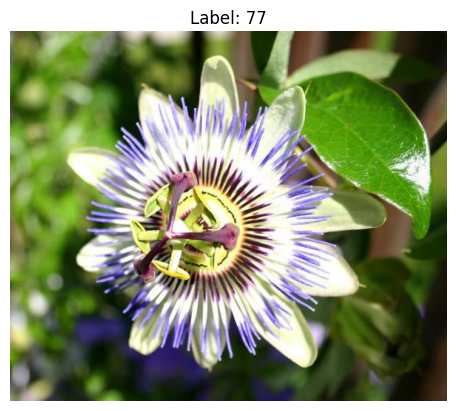

In [ ]:
# error checking
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load a sample image from the merged DataFrame
sample_image_path = os.path.join(image_folder, df_image_labels['image_filename'].iloc[0])
img = mpimg.imread(sample_image_path)

# Plot the image
plt.imshow(img)
plt.title(f"Label: {df_image_labels['labels'].iloc[0]}")
plt.axis('off')
plt.show()



## train test validation split

In [ ]:
# train, validation and test split
for id in df_setid_trnid[0]:
    df_image_labels.loc[df_image_labels['image_id'] == id, 'set'] = 'train'

for id in df_setid_valid[0]:
    df_image_labels.loc[df_image_labels['image_id'] == id, 'set'] = 'valid'

for id in df_setid_tstid[0]:
    df_image_labels.loc[df_image_labels['image_id'] == id, 'set'] = 'test'

df_image_labels['set'].value_counts()


set
test     6149
valid    1020
train    1020
Name: count, dtype: int64

In [ ]:
df_image_labels.to_csv('image_labels.csv', index=False)
df_image_labels.head()

,image_filename,image_id,labels,set
0,image_00001.jpg,1,77,test
1,image_00002.jpg,2,77,test
2,image_00003.jpg,3,77,test
3,image_00004.jpg,4,77,test
4,image_00005.jpg,5,77,test
